In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [2]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train=X_train/255.0
X_test=X_test/255.0

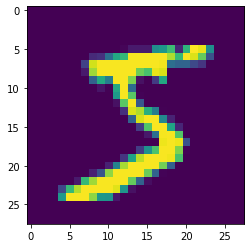

In [7]:
plt.imshow(X_train[0])


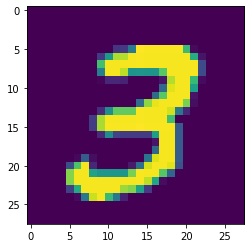

In [8]:
plt.imshow(X_train[7])

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
#flattening 
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [11]:
X_test_flattened.shape

(10000, 784)

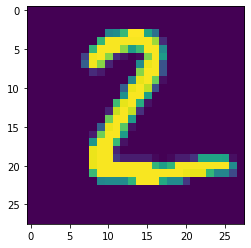

In [12]:
plt.imshow(X_test[1])

In [13]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid')
])
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)
model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=10,callbacks=[tb_callback])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2732 - accuracy: 0.9213
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1234 - accuracy: 0.9641
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0863 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0653 - accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0523 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0423 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0345 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0282 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0221 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.018

Text(69.0, 0.5, 'truth')

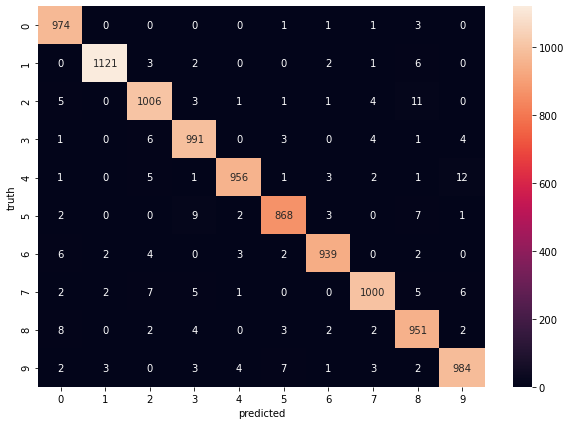

In [17]:
y_pred=model.predict(X_test_flattened)
y_pred_labels=[np.argmax(i) for i in y_pred]

cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel("truth")

In [18]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 3s 2ms/step - loss: 0.0768 - accuracy: 0.9790


[0.07678887248039246, 0.9789999723434448]

In [19]:
y_pred=model.predict(X_test_flattened)

In [20]:
y_pred[0]

array([5.34764118e-02, 7.38957760e-06, 1.17815351e-02, 9.55711186e-01,
       9.10890563e-09, 1.41893004e-04, 1.07265384e-10, 9.99994636e-01,
       1.48560867e-01, 7.66297042e-01], dtype=float32)

In [21]:
np.argmax(y_pred[1])

2

In [22]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)